# Summer 2025 UCLA Extension 450.2

Keane Gonzalez

# Introduction

## !!!!!!!!!!!!SCRATCH: FINAL PROJECT REQUIREMENTS
Set-up
You must include a short description of your dataset, why you are interested in it, a link to where others can access the data, and a link to documentation about the data (if different from the data access link).

Thorough exploration of the non-value qualities of the data

You must demonstrate for example that you can identify the number of records, number of features, variable names, variable datatypes (including whether the data is numerical vs categorical, discrete vs continuous, etc), number of unique values for categorical data, and number of missing values

You must also explain whether your findings make sense – do they match your expectations? Are they consistent with the documentation for the data?
Thorough exploration of the data values

You must demonstrate for example that you can get summary statistics about the data, identify the range of values for each variable, identify abnormal values (outliers, null values, infinities, etc), identify the categorical values for categorical data, and quantify relationships between variables (such as by calculating correlation coefficients).
You must explain whether your findings make sense – Are there any unusual values or are they consistent with your expectations? Can you double-check any values against reasonable ranges? (for example, are all ages between 0 and ~100?)

If there are missing values, you must eliminate them (e.g. by removing records, removing a variable from your entire dataset, or filling in the missing value with an appropriate alternative value)

You must comment on whether any values would be better represented in another form (e.g. do you think a categorical variable would be better represented in numerical form? Or a numerical variable in categorical form? Is there a variable that might provide useful insights if it were instead binned, rescaled, or transformed?)

Based on these comments, create at least one new column in your dataset that applies a transformation to an existing variable (binning, rescaling, numerical transformation, conversion of numerical to categorical, etc).

If you have not identified any variable on which to do this, just pick one to show the process

Data visualization
You must demonstrate that you can visualize the composition of your data, trends and patterns in values, and relationships or comparative values between two or more variables
You should include at least one histogram, box plot, bar plot, line plot, and scatter plot

You should include at least two univariate plots, two bivariate plots, and two multi-variate plots

These are minimum requirements to ensure you have a breadth of plots - the number of plots should be much higher to flesh out your exploratory analysis

Wrap-up

Comment on any insights you’ve obtained from your data exploration and visualization

Offer at least three questions that you would explore in greater detail if you had more time to do research with this data

# Problem
1. What features affect life expectancy the most?

2. How does life expectancy affect national level statistics

3. ???


# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot


import os

import seaborn as sns

## Dataset Import

In [2]:
!pip install kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kumarajarshi/life-expectancy-who")

print("Path to dataset files:", path)

Path to dataset files: /home/kgonzalez/.cache/kagglehub/datasets/kumarajarshi/life-expectancy-who/versions/1


In [3]:
csv_file = './life_expectancy_data.csv' #copied and renamed to our folder
if (os.path.exists(csv_file) is True):
    print(f'Found the input file')

Found the input file


# DEFINITIONS

In [4]:
!ls -lart

total 2680
-rw-rw-r-- 1 kgonzalez kgonzalez  333442 Sep 27  2019 'Life Expectancy Data.csv'
-rw-rw-r-- 1 kgonzalez kgonzalez  121472 Aug 14 11:01  archive.zip
drwxrwxr-x 2 kgonzalez kgonzalez    4096 Aug 14 11:05  .ipynb_checkpoints
-rw-rw-r-- 1 kgonzalez kgonzalez  333442 Aug 14 11:06  life_expectancy_data.csv
drwxrwxr-x 5 kgonzalez kgonzalez    4096 Aug 16 00:43  ..
drwxrwxr-x 3 kgonzalez kgonzalez    4096 Aug 16 00:45  SAVED
drwxrwxr-x 3 kgonzalez kgonzalez    4096 Aug 19 00:08  UCLA_450.2_SUMMER
-rw-rw-r-- 1 kgonzalez kgonzalez 1927585 Aug 19 01:30  FinalProject_KeaneGonzalez.ipynb
drwxrwxr-x 5 kgonzalez kgonzalez    4096 Aug 19 01:30  .


In [5]:
path

'/home/kgonzalez/.cache/kagglehub/datasets/kumarajarshi/life-expectancy-who/versions/1'

In [6]:
!ls '/home/jovyan/.cache/kagglehub/datasets/kumarajarshi/life-expectancy-who/versions/1'

ls: cannot access '/home/jovyan/.cache/kagglehub/datasets/kumarajarshi/life-expectancy-who/versions/1': No such file or directory


## Read CSV Data

In [7]:
who_df=pd.read_csv(csv_file)

## Describe the new dataframe contents

In [8]:
who_df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [9]:
who_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [10]:
who_df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

## Feature Definitions

Country: Name of the country

Year: Year of observation

Status: Classification as Developed or Developing

Life expectancy: Average expected lifespan of a newborn

Adult Mortality: Death rate of individuals aged 15–60 (per 1,000)

Infant deaths: Total deaths in early childhood

Under-five deaths: Total deaths in early childhood

Hepatitis B: Immunization coverage rates

Polio: % of coverage of Polio (Pol3) immunization among 1-year-olds.

Diphtheria: Represents % of coverage of Diphtheria tetanus toxoid and pertussis (DTP3) immunization among 1-year-olds.

Measles: Number of reported measles cases

HIV/AIDS: 

BMI: BMI is a measure of nutritional status in adults. It is defined as a person's weight in kilograms divided by the square of that person's height in meters (kg/m2)

Thinness indicators: Prevalence of underweight children and teens


GDP: GDP per capita (USD)

Schooling: Average years of education

Income composition of resources: Index reflecting income-related development

Health expenditure: Absolute and relative government health spending

Population: Total national population


Response Variable:
Y: Life expectancy – Life Expectancy in age
Regressors:
Country – Country
Year – Year
X1: Status – Developed or developing status
X2: Adult Mortality – Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per1000 population)
X3: Infant deaths – Number of Infant Deaths per 1000population
X4: Alcohol – Alcohol,recorded per capita (15+)consumption (in litres of pure alcohol)
X5: Percentage expenditure – Expenditure on health asa percentage of Gross Domestic Product per capita (%)
X6: Hepatitis B – Hepatitis B (HepB) immunizationcoverage among 1-year-olds (%)
X7: Measles – Number of reported Measles cases per1000 population
X8: BMI – Average Body Mass Index of entire population
X9: Under-five deaths – Number of under-five deathsper 1000 population
X10: Polio – Polio (Pol3) immunization coverage among1-year-olds (%)
X11: Total expenditure – General governmentexpenditure on health as a percentage of totalgovernment expenditure (%)
X12: Diphtheria – Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
X13: HIV/AIDS – Deaths per 1 000 live births HIV/AIDS(0-4 years)
X14: GDP – Gross Domestic Product per capita (in USD)
X15: Population – Population of the country
X16: Thinness 1-19 years – Prevalence of thinness among children and adolescents for Age 10 to 19 (%)
X17: Thinness 5-9 years – Prevalence of thinness amongchildren for Age 5 to 9(%)
X18: Income composition of resources – Human Development Index in terms of income composition ofresources (index ranging
from 0 to 1)
X19: Schooling – Number of years of Schooling (years)

## Prepare the data

### Look for any missing numerical data

In [11]:
nan_counts = who_df.isnull().sum()
print(nan_counts)

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [12]:
print(type(nan_counts))

<class 'pandas.core.series.Series'>


### Repair any missing numerical data

In [13]:
#loop over each column and replace missing data with its mean value for that column
column_list=who_df.columns.tolist()

nan_counts =who_df.isnull().sum()
print(f'Number of empty entries found (total) in dataset is {nan_counts}')

for counter, colname in enumerate(column_list):
    # Check to see if this is a numeric column
    if pd.api.types.is_numeric_dtype(who_df[colname]):
        print(f"Column '{colname}': {who_df[colname].dtype}")

        #
        # Replace any missing values with the mean of this column
        #

        who_df[colname] = who_df[colname].fillna(who_df[colname].mean())
        #df['A'] = df['A'].fillna(df['A'].mean())

nan_counts = who_df.isnull().sum()
print(f'After missing data correction, we have missing entries\n {nan_counts}')


Number of empty entries found (total) in dataset is Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64
Column 'Year': int64
Column 'Life expectancy ': float64
Column 'Adult Mortali

### Look for missing categorical data

### Find categorical columns

In [14]:
#
# Find all of the columns that are not numeric (usually object)
#
object_list =who_df.select_dtypes(include=['object']).columns
print(f'Columns with object dtype are:\n {object_list}')



Columns with object dtype are:
 Index(['Country', 'Status'], dtype='object')


In [15]:
object_list=[]
for col in who_df.columns:
    is_categorical =pd.api.types.is_object_dtype(who_df[col].dtype)  # pd.api.types.is_categorical_dtype(who_df[col].dtype) or 
    if (is_categorical is True):
        print(f'Column {col} is non-numeric')
        object_list.append(col)

print(f'Columns that are non-numeric: {object_list}')

Column Country is non-numeric
Column Status is non-numeric
Columns that are non-numeric: ['Country', 'Status']


In [16]:
if (len(object_list) > 1): #we found some entries that we need to check
    #look for empty values or empty strings
    for col in object_list:
        nulls = who_df[col].isnull
        print(f'\n\n# of null values found for {col} is: \n\n{nulls}')



# of null values found for Country is: 

<bound method Series.isnull of 0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
2933       Zimbabwe
2934       Zimbabwe
2935       Zimbabwe
2936       Zimbabwe
2937       Zimbabwe
Name: Country, Length: 2938, dtype: object>


# of null values found for Status is: 

<bound method Series.isnull of 0       Developing
1       Developing
2       Developing
3       Developing
4       Developing
           ...    
2933    Developing
2934    Developing
2935    Developing
2936    Developing
2937    Developing
Name: Status, Length: 2938, dtype: object>


In [17]:
#
# Replace any missing data with its neighbor
#
who_df.select_dtypes(include=['object']).columns


Index(['Country', 'Status'], dtype='object')

In [18]:
# 2. Empty strings ('')
#is_empty_string = (series == '')

# 3. Strings containing only whitespace
# We use .str.isspace() to check if a string consists of only whitespace characters.
# The or operator with an empty string check is important because .str.isspace() returns False for empty strings.
# We apply this to the series that are not already identified as missing by isna() to avoid errors on non-string types.
#is_whitespace = series.astype(str).str.isspace()

### Look for all spaces 

In [19]:
#
#   DEBUG ONLY!!!!!!!!
#
#



#add a fake space to test out the fix for spaces
who_df.loc[0,object_list[0]] ='   '
print(who_df.loc[0,object_list[0]] )

In [20]:

for col in object_list:
    space_found = who_df[col].str.isspace()
    if (space_found.sum() > 0): # there is a true value, meaning a positive finding for an entry of value ' '
        print(f'Found an entry with spaces in {col}')
        



Found an entry with spaces in Country


In [21]:
spaces = who_df[object_list[0]].str.isspace()
#rows that are spaces will show up as true in the series, so sum those to get how many failed 

print(spaces)
print(type(spaces))

0        True
1       False
2       False
3       False
4       False
        ...  
2933    False
2934    False
2935    False
2936    False
2937    False
Name: Country, Length: 2938, dtype: bool
<class 'pandas.core.series.Series'>


In [22]:
print(f'value>>{who_df['Country'][0]}<<')
who_df['Country'].str.isspace()

value>>   <<


0        True
1       False
2       False
3       False
4       False
        ...  
2933    False
2934    False
2935    False
2936    False
2937    False
Name: Country, Length: 2938, dtype: bool

### Repair entries with just spaces
If the questionable entry is surrounded by two of the same values, copy that value into its spot

In [23]:
who_df.loc[spaces, 'Country'] = np.nan
who_df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,NaN,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [24]:
def repair_spaces(missing_series):
    missing_series is True



    return

In [25]:
data = {
    'product_id': [101, 102, 103, 104, 105],
    'product_name': ['Keyboard', 'Mouse', 'Monitor', 'Speakers', 'Webcam']
}

df = pd.DataFrame(data)
df

,product_id,product_name
0,101,Keyboard
1,102,Mouse
2,103,Monitor
3,104,Speakers
4,105,Webcam


In [26]:
df.loc[2, 'product_name'] = ' '
df

,product_id,product_name
0,101,Keyboard
1,102,Mouse
2,103,
3,104,Speakers
4,105,Webcam


# General Statistics

## Correlations of numeric features
Get a correlation between all of the numeric-only features 

### Get a list of only numeric features

In [27]:
#
# Get only the features that are numeric, for later analysis
#
number_columns_list = who_df.select_dtypes(include='number').columns.tolist()
print(f'Feature columns with numeric data:\n {number_columns_list}')

Feature columns with numeric data:
 ['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


### Correlation Heatmap of All Numeric Features

<Axes: >

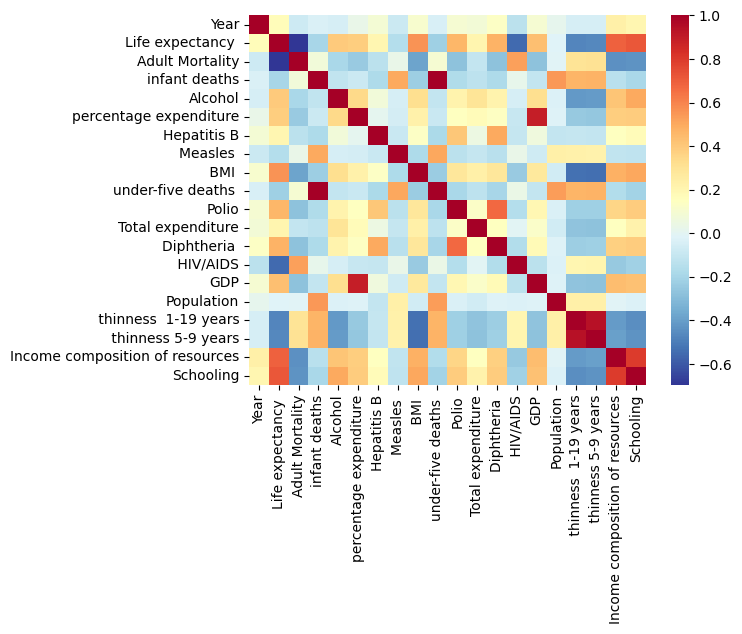

In [28]:
sns.heatmap(who_df[number_columns_list].corr(),cmap='RdYlBu_r')

## Correlation to life expectancy
Get a correlation between the numeric data and life expectancy

In [29]:
correlation = who_df[number_columns_list].corr() #save the 

life_expectancy_correlation = correlation['Life expectancy ']
sorted_correlations = life_expectancy_correlation.abs().sort_values(ascending=False)


print('Features having the highest correlation with Life Expectancy')
print(sorted_correlations)

Features having the highest correlation with Life Expectancy
Life expectancy                    1.000000
Schooling                          0.715066
Adult Mortality                    0.696359
Income composition of resources    0.692483
 BMI                               0.559255
 HIV/AIDS                          0.556457
Diphtheria                         0.475418
 thinness  1-19 years              0.472162
 thinness 5-9 years                0.466629
Polio                              0.461574
GDP                                0.430493
Alcohol                            0.391598
percentage expenditure             0.381791
under-five deaths                  0.222503
Total expenditure                  0.207981
Hepatitis B                        0.203771
infant deaths                      0.196535
Year                               0.169623
Measles                            0.157574
Population                         0.019638
Name: Life expectancy , dtype: float64


### Keep the top 5 features correlated to life expectancy

In [30]:
#
# Keep the top 5 (skip the first, since it's a correlation of life expectancy with itself)
#
top5_correlation_features = sorted_correlations[0:6].index
print(top5_correlation_features)

Index(['Life expectancy ', 'Schooling', 'Adult Mortality',
       'Income composition of resources', ' BMI ', ' HIV/AIDS'],
      dtype='object')


### Correlation Heatmap of Top 5 Features

<Axes: >

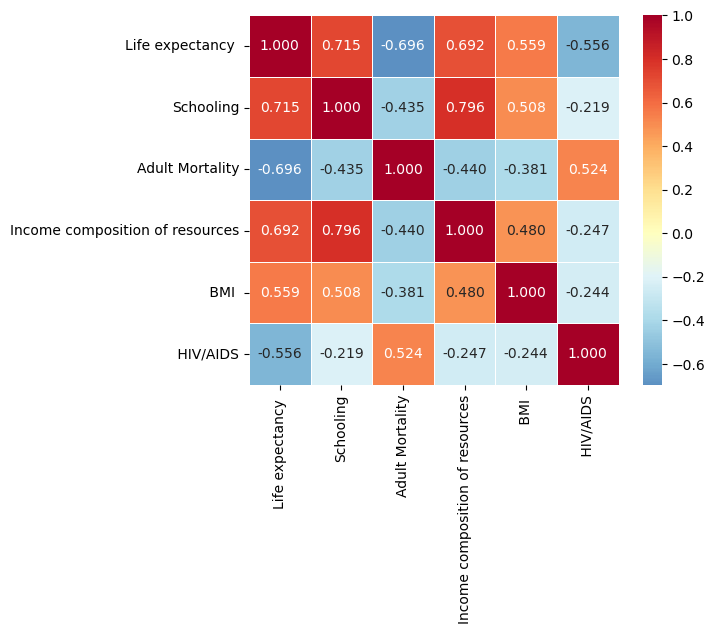

In [31]:
#
# Generate a correlation matrix with the top-5 features correlated with life expectancy
#
#reduced features
sns.heatmap(who_df[top5_correlation_features].corr(),
            annot=True,
            cmap='RdYlBu_r',
            center=0,
            square=True,
            linewidths=0.5,
            fmt='.3f')

## Analysis: Top 5 Correlation Heatmap
Using only the top 5 highest correlation features with life expectancy, the heatmap shows that schooling correlates very well with life expectancy. The second highest correlation is Adult Mortality, which makes sense, since an increase in adult deaths per population would raise or lower your overall life expectancy as a population. 

## Histograms 

In [32]:
number_columns_list

['Year',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

19 5
Life expectancy 


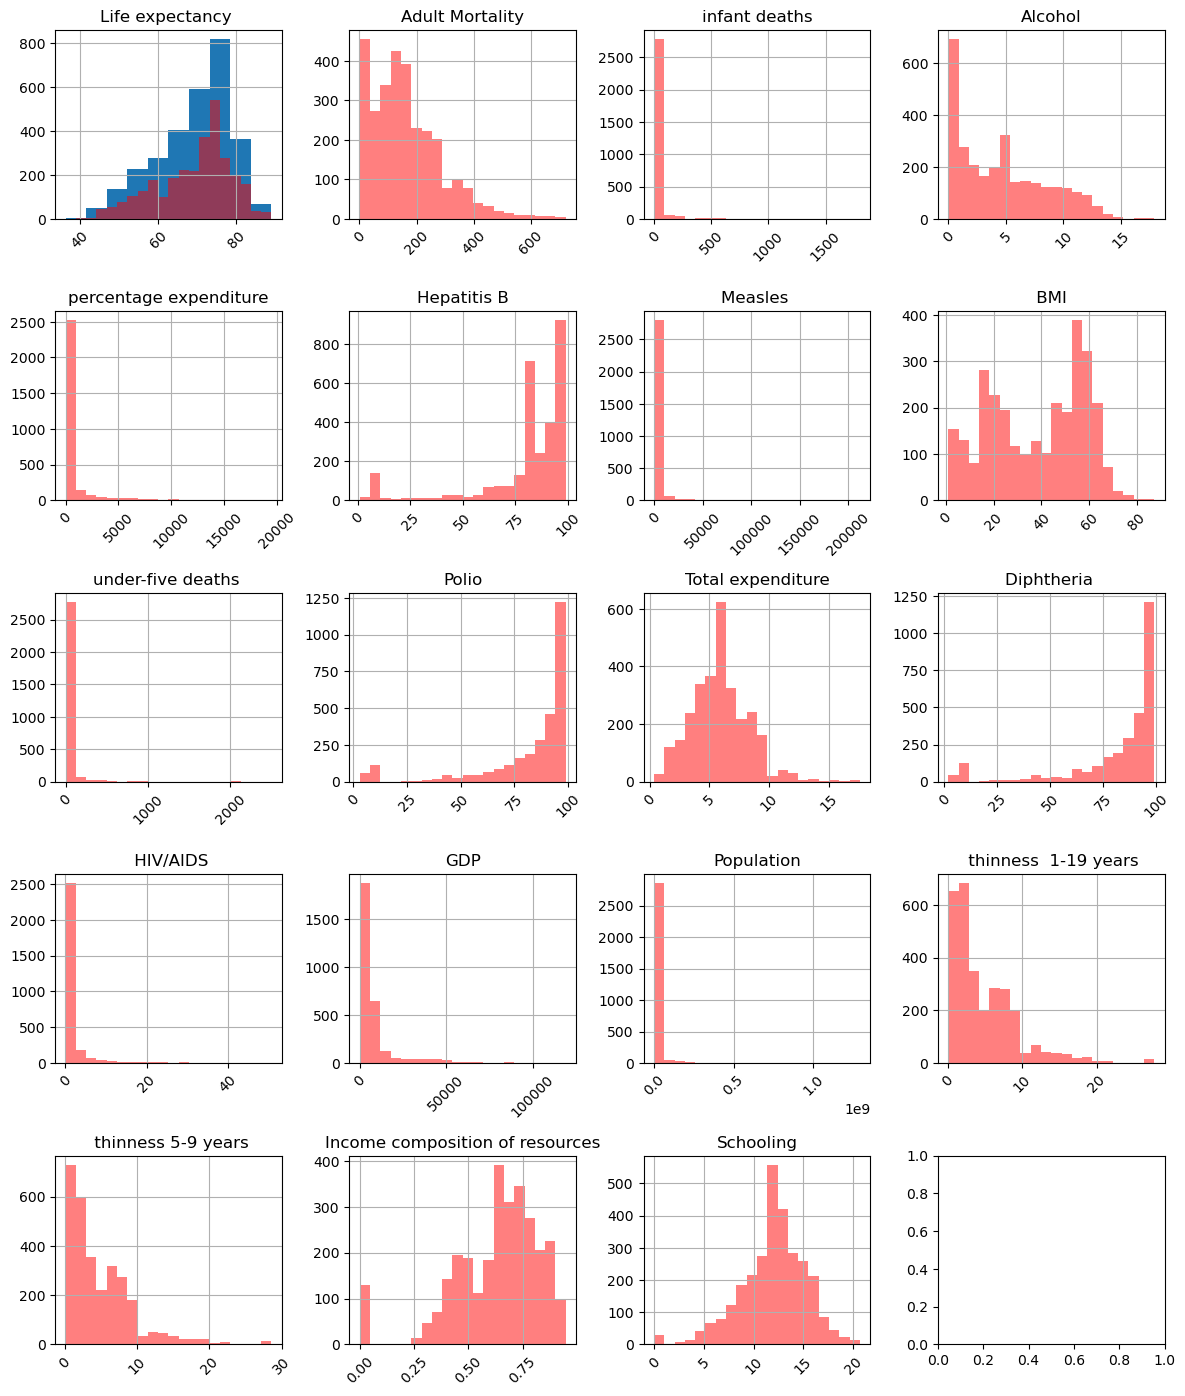

In [33]:
#who_df[number_columns_list].hist()
number_columns_list.remove('Year')
num_columns = len(number_columns_list)


figure_rows = np.uint16(np.floor(num_columns/4) + np.ceil((num_columns%4)/4)) #4 features per row + an extra row for any remaining features
print(f'{num_columns} {figure_rows}')

fig, axes = plot.subplots(nrows=figure_rows, ncols=4, figsize=(12, 14))
#axes_flat = axes.flatten()

print(number_columns_list[0])
axe = axes.ravel()
who_df[number_columns_list[0]].hist(ax=axe[0])

for counter,col in enumerate(number_columns_list):
    who_df[col].hist(bins=20, ax=axe[counter], alpha=0.5, color='red')
    axe[counter].set_title(col)
    axe[counter].tick_params(axis='x', labelrotation=45)
plot.tight_layout()



In [34]:
who_df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.938190,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.507640,124.080302,117.926501,3.916288,1987.914858,22.586855,11467.272489,19.927677,160.445548,23.352143,2.400274,23.640073,5.077785,13136.800417,5.381546e+07,4.394535,4.482708,0.204820,3.264381
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,80.940461,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.000000,144.000000,3.000000,4.160000,64.912906,87.000000,17.000000,43.000000,4.000000,93.000000,5.938190,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.662000,12.100000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,7483.158469,1.275338e+07,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


## Analysis: Raw Histogram Data
  Using the raw histograms, a few things can be noticed about some of the more general features.

1. For life expectancy, the majority of the records reside around the mean of 69 years. The range varies greatly between a low of 36 years of life expectancy and a high of 89 years of life expectancy. 
2. Adult Mortality has a mean of 164 deaths (ages 15-60) per 1000 individuals per population. The histogram clusters around the mean, but there is a small tail leading up to a max of 723 deaths.


** PUT INTO ORDERED LIST FORM INSTEAD AND CLEAN UP **
Life Expectancy: It is expected that most people will live to 69 years of age. The histogram shows a wide distribution, from 36 years to a max of 89 years of age.

Adult Mortality: The death rate of individual 15-60 (per 1,000) shows a mean value of 164 deaths per 1,000 people, but this has a range up to 723 at the higher end of the histogram.


Infant Deaths: With an average of 19 infant deaths per country, infant health remains a critical concern. Some nations report over 1000 deaths, highlighting areas where maternal and infant care is severely lacking.

Alcohol Consumption: Consumption levels also differ substantially. The average is around 4.4 liters per person per year, but in some places, it exceeds 12 liters, pointing to cultural and socioeconomic differences in lifestyle.

Health Expenditure: Spending on health varies enormously. The average is about $685 per capita

Immunizations: Global vaccination coverage is mixed. Around 77% of people receive the Hepatitis B vaccine, and about 81% are covered for Polio and Diphtheria, reflecting progress — but also gaps — in immunization programs.

Infectious Diseases: Despite vaccines, diseases like measles still pose a major challenge, with an average of 1,255 reported cases per country. In some regions, case counts soar into the hundreds of thousands.

Economic Indicators:

GDP per Capita averages about $4,483, but there's a vast disparity between wealthier and poorer nations.
Population sizes range dramatically, averaging around 7.72 million, but spanning from tiny nations to countries with populations over 1 billion.
Nutritional Health: Thinness — an indicator of undernutrition — affects approximately 5% of children aged 1–19 and 5–9 years. While low overall, it still signals significant issues in parts of the world.

Income Composition: Scored on a scale from 0 to 1, this metric averages 0.62, suggesting moderate access to and distribution of resources — again, with wide variations by region.

Education: Schooling spans from 1 to 16 years, with a global average of around 12 years. This reflects differing investments in education and access across countries.

### Distribution of the development status of the world

This shows the distribution of the Status category across the world. The most notable point is that countries that are given a Developing status outnumber the Developed countries 5:1.

Text(0.5, 0, 'National Status')

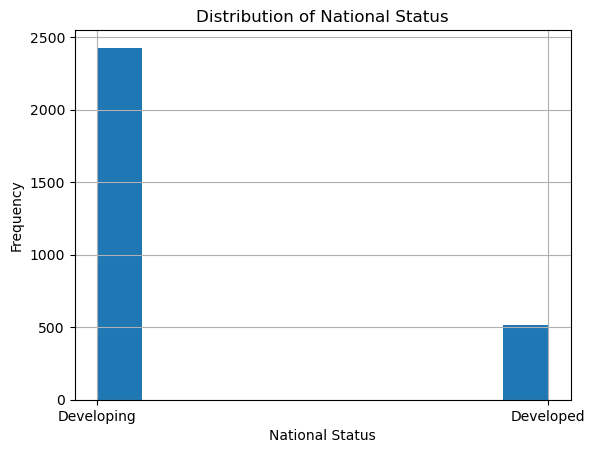

In [38]:
who_df['Status'].astype('category').hist()
plot.title('Distribution of National Status')
plot.ylabel('Frequency')
plot.xlabel('National Status')

#### Mean Life Expectancy Per Year
By plotting mean life expectancy per year for the world, the developing nations, and developed nations, we see a clear difference between the developing world and the developed. 

In [39]:
#
# Get the life expectancy for the all records by year, then for all records with the Developing Status and lastly all records with the Developed Status.
#
mean_life_expectance = who_df.groupby("Year")["Life expectancy "].mean()
mean_life_expectance_developing = who_df[who_df.Status == "Developing"].groupby("Year")["Life expectancy "].mean()
mean_life_expectance_developed = who_df[who_df.Status == "Developed"].groupby("Year")["Life expectancy "].mean()

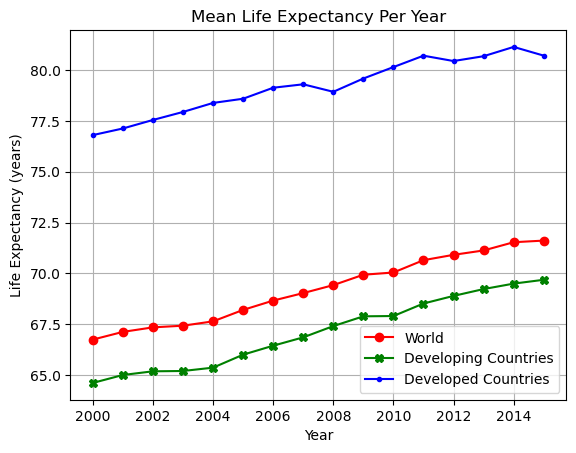

In [40]:
#
# Create line plots for both the developing nations and developed nations
#
plot.figure()

plot.plot(mean_life_expectance, marker='o', color='r')
plot.plot(mean_life_expectance_developing, marker='X', color='g')
plot.plot(mean_life_expectance_developed, marker='.', color='b')

plot.title('Mean Life Expectancy Per Year')
plot.grid()
plot.xlabel('Year')
plot.ylabel('Life Expectancy (years)')
plot.legend(['World','Developing Countries','Developed Countries'])

In [41]:
who_df[number_columns_list[2]]

0       62
1       64
2       66
3       69
4       71
        ..
2933    27
2934    26
2935    25
2936    25
2937    24
Name: infant deaths, Length: 2938, dtype: int64

### Diseases and Life Expectancy
Look at some basic information on how the various diseases and immunization rates affect world life expectancy

### Heatmap of Disease correlations

In [42]:
#
# Set up a list containing all of the disease related features
# Set up another list with some basic plot information for each of these features
#
#disease_list= ['Country','Hepatitis B','Measles ','Polio','Diphtheria ',' HIV/AIDS']	
disease_list=['Country','Life expectancy ','Hepatitis B','Measles ','Polio','Diphtheria ',' HIV/AIDS']
disease_yaxis = ['Years','% Immunized', '% Immunized', '% Immunized', '% Immunized', 'Affected Pop (1k)'] #skipping the Country element of the main list

Features having the highest correlation with Life Expectancy
Life expectancy     1.000000
 HIV/AIDS           0.556457
Diphtheria          0.475418
Polio               0.461574
Hepatitis B         0.203771
Measles             0.157574
Name: Life expectancy , dtype: float64


<Axes: >

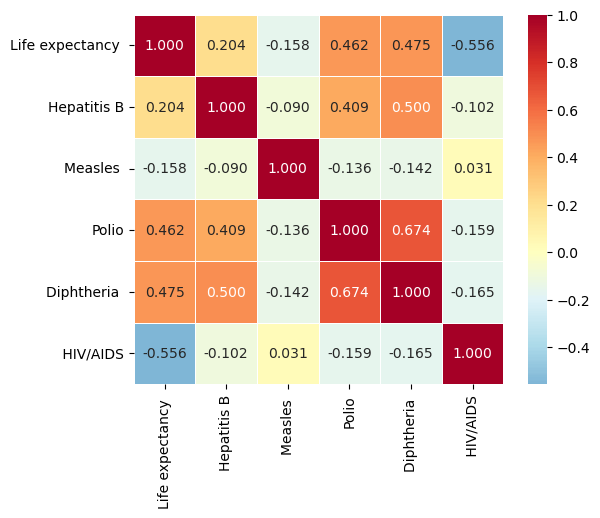

In [43]:
#sns.heatmap(who_df[disease_list[1:]].corr())

#
# 
#

disease_correlation = who_df[disease_list[1:]].corr() #save the 

life_expectancy_disease_correlation = disease_correlation['Life expectancy ']
sorted_correlations = life_expectancy_disease_correlation.abs().sort_values(ascending=False)


print('Features having the highest correlation with Life Expectancy')
print(sorted_correlations)

sns.heatmap(who_df[disease_list[1:]].corr(),annot=True,
            cmap='RdYlBu_r',
            center=0,
            square=True,
            linewidths=0.5,
            fmt='.3f')

### Analysis: Disease Correlation to Life Expectancy
Limiting the correlation to just life expectancy and the disease/immunization related features, Polio and Diphtheria immunization rates show the highest correlation (0.462 and 0.475, respectively) to Life expectancy. Using google statistics for 2014, Polio had 74 reported cases and diptheria had 2100 deaths. The deaths due to these two features are not likely significant, but possibly the fact that nations provide immunizations for diseases that are not global killers shows evidence of more advanced healthcare prevention. 



>>> Google information

2014
Based on data from the World Health Organization (WHO) and other global health reports, here are the estimated worldwide deaths for each disease in 2015.

Hepatitis B
It is estimated that viral hepatitis, which includes both Hepatitis B and C, caused 1.4 million deaths in 2016. While there is no definitive number for 2015, the global mortality rate remained stable in the 2015-2019 period, suggesting a very similar figure for 2015.

Measles
In 2015, there were an estimated 134,200 deaths from measles globally. The vast majority of these deaths occurred in children under the age of five.

Polio
Due to global vaccination efforts, there were only 74 reported cases of wild poliovirus worldwide in 2015. While there is no specific global death count for this year, the number of deaths is considered extremely low, especially when compared to the other diseases on this list.

Diphtheria
In 2015, diphtheria resulted in approximately 2,100 deaths. Widespread vaccination has significantly reduced the death toll from this disease since the 1990s.

HIV/AIDS
According to the Global Burden of Disease Study, HIV/AIDS caused an estimated 1.2 million deaths in 2015. It was one of the world's leading infectious causes of death that year.

2014
HIV/AIDS: ~630,000 deaths

Hepatitis B: ~820,000 to 1.1 million deaths. However, many of these are due to long-term complications like liver cancer and cirrhosis.

Measles: ~107,500 deaths

Diphtheria: ~1,300 to 2,100 deaths (based on recent reported numbers)

Polio: There are very few deaths from polio today due to widespread vaccination. Before the vaccine, it could cause thousands of deaths annually, but now it is on the verge of being eradicated.

In [44]:
who_df.columns.tolist()

['Country',
 'Year',
 'Status',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

### Show Immunization Rate For the Top 5 Countries with the highest life expectancy and the 5 countries with lowest life expectancy

[2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002
 2001 2000]
Hepatitis B
Measles 
Polio
Diphtheria 
 HIV/AIDS


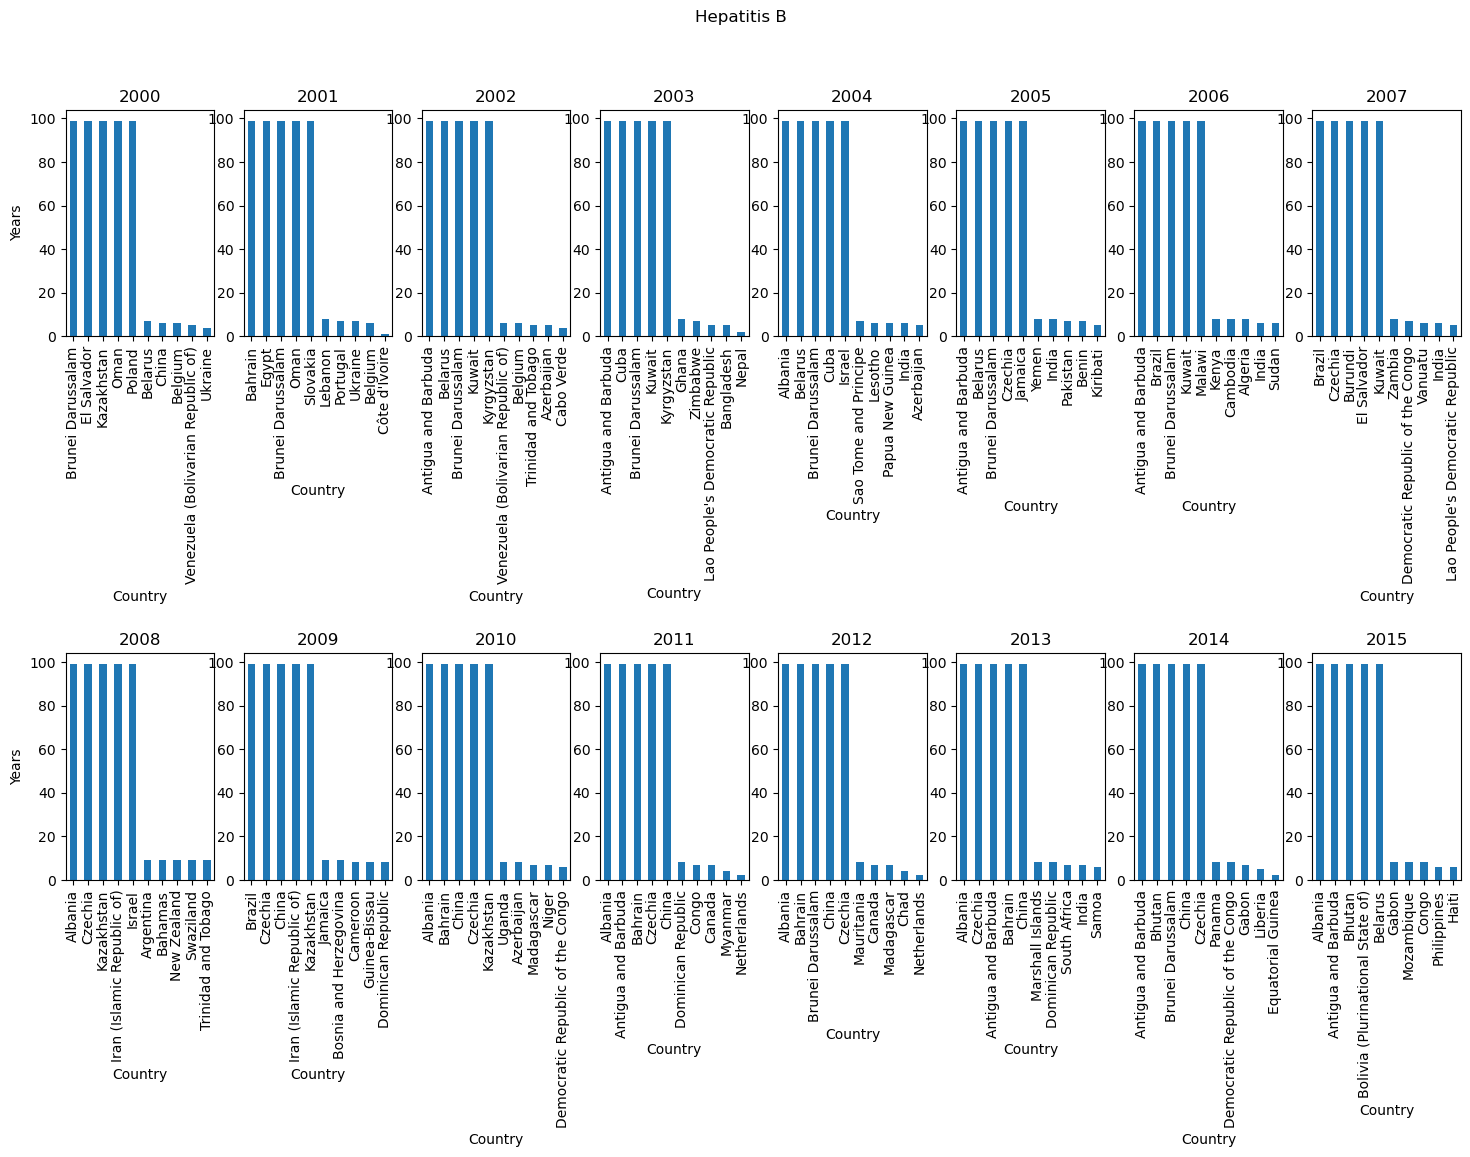

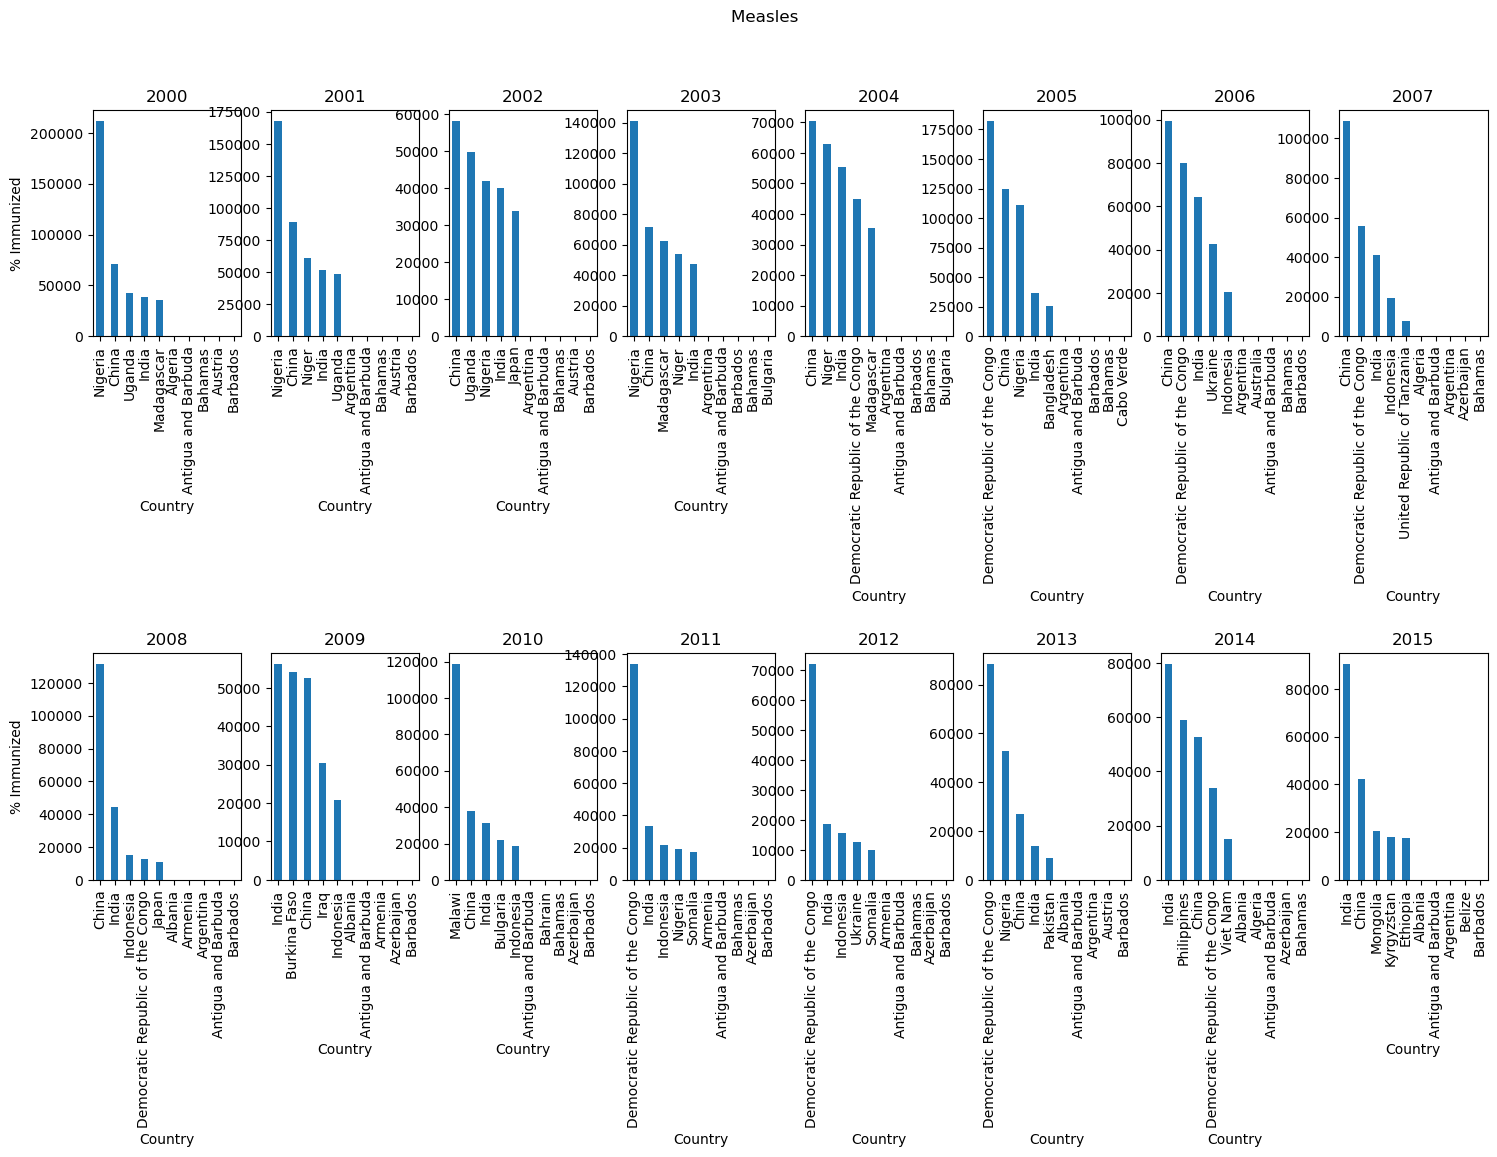

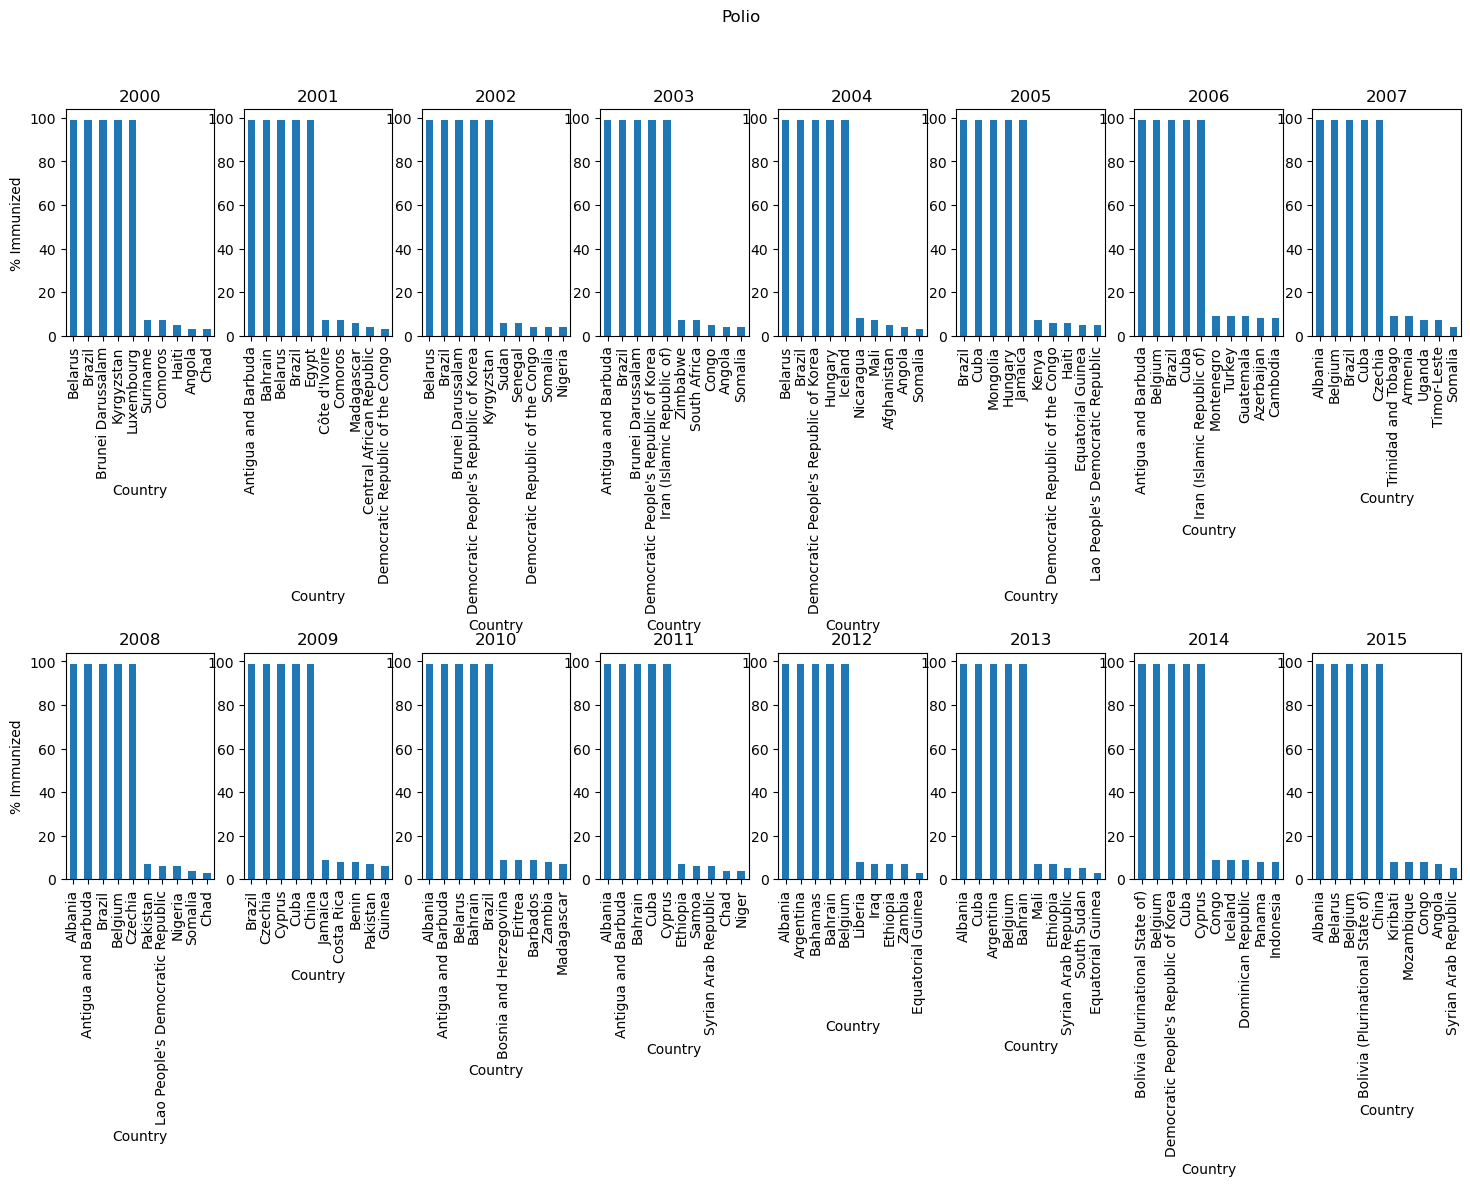

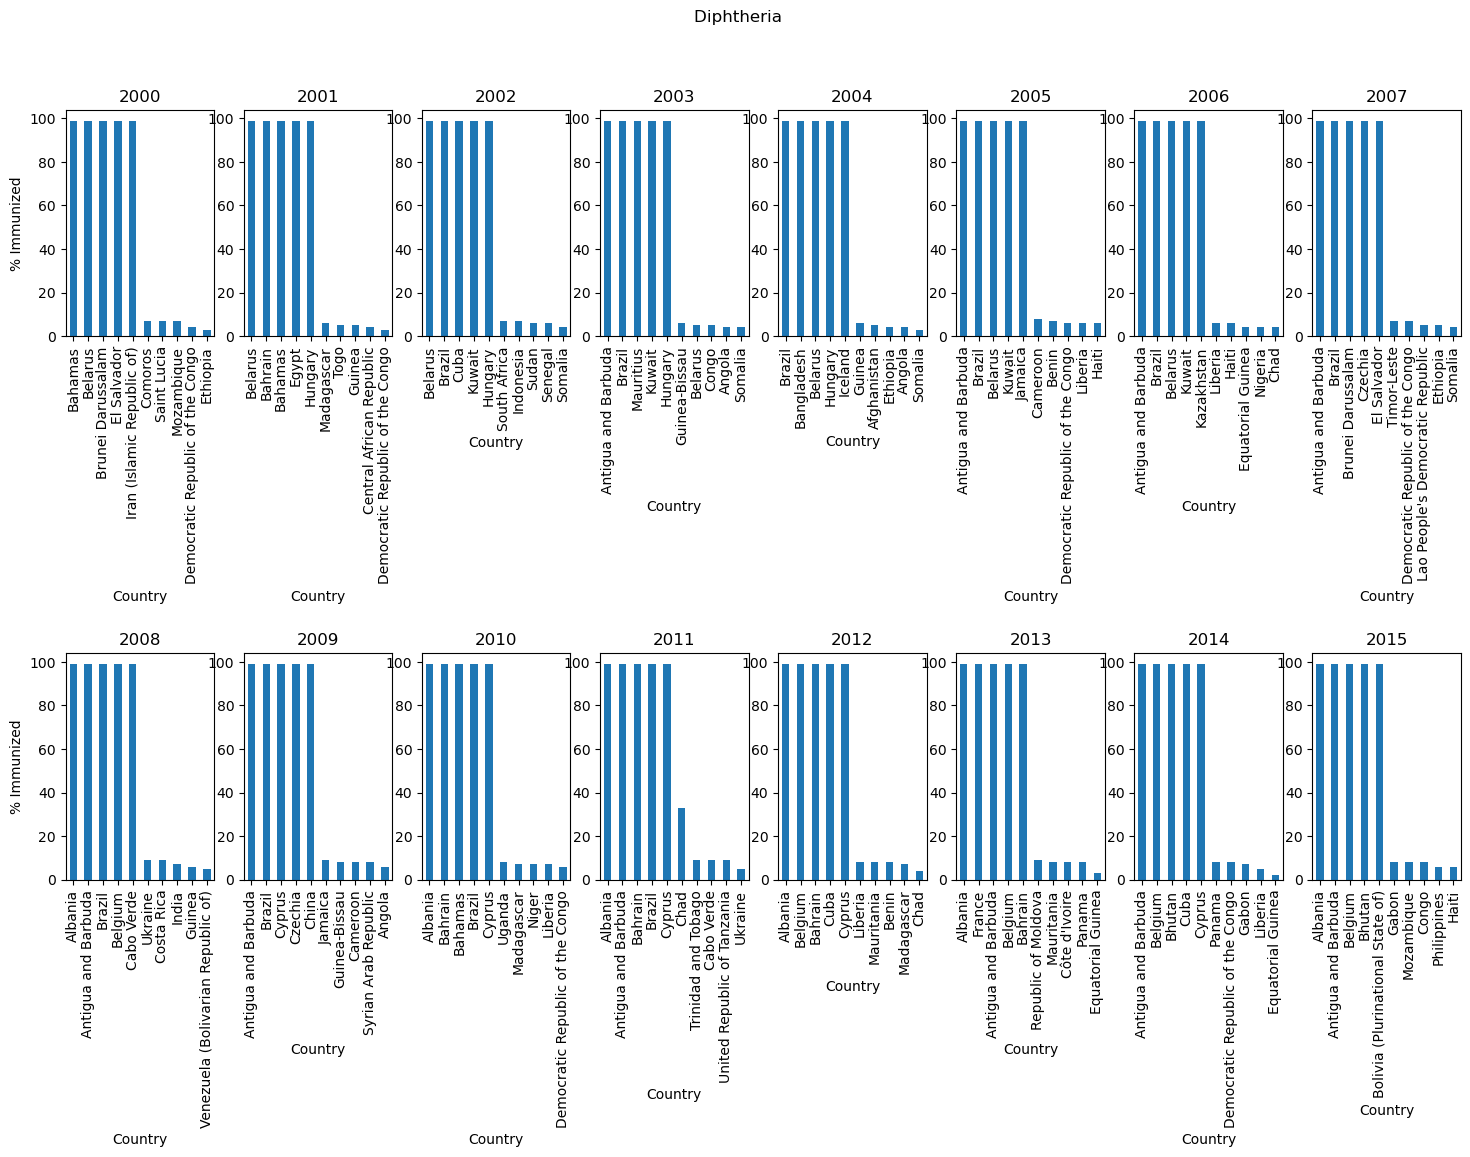

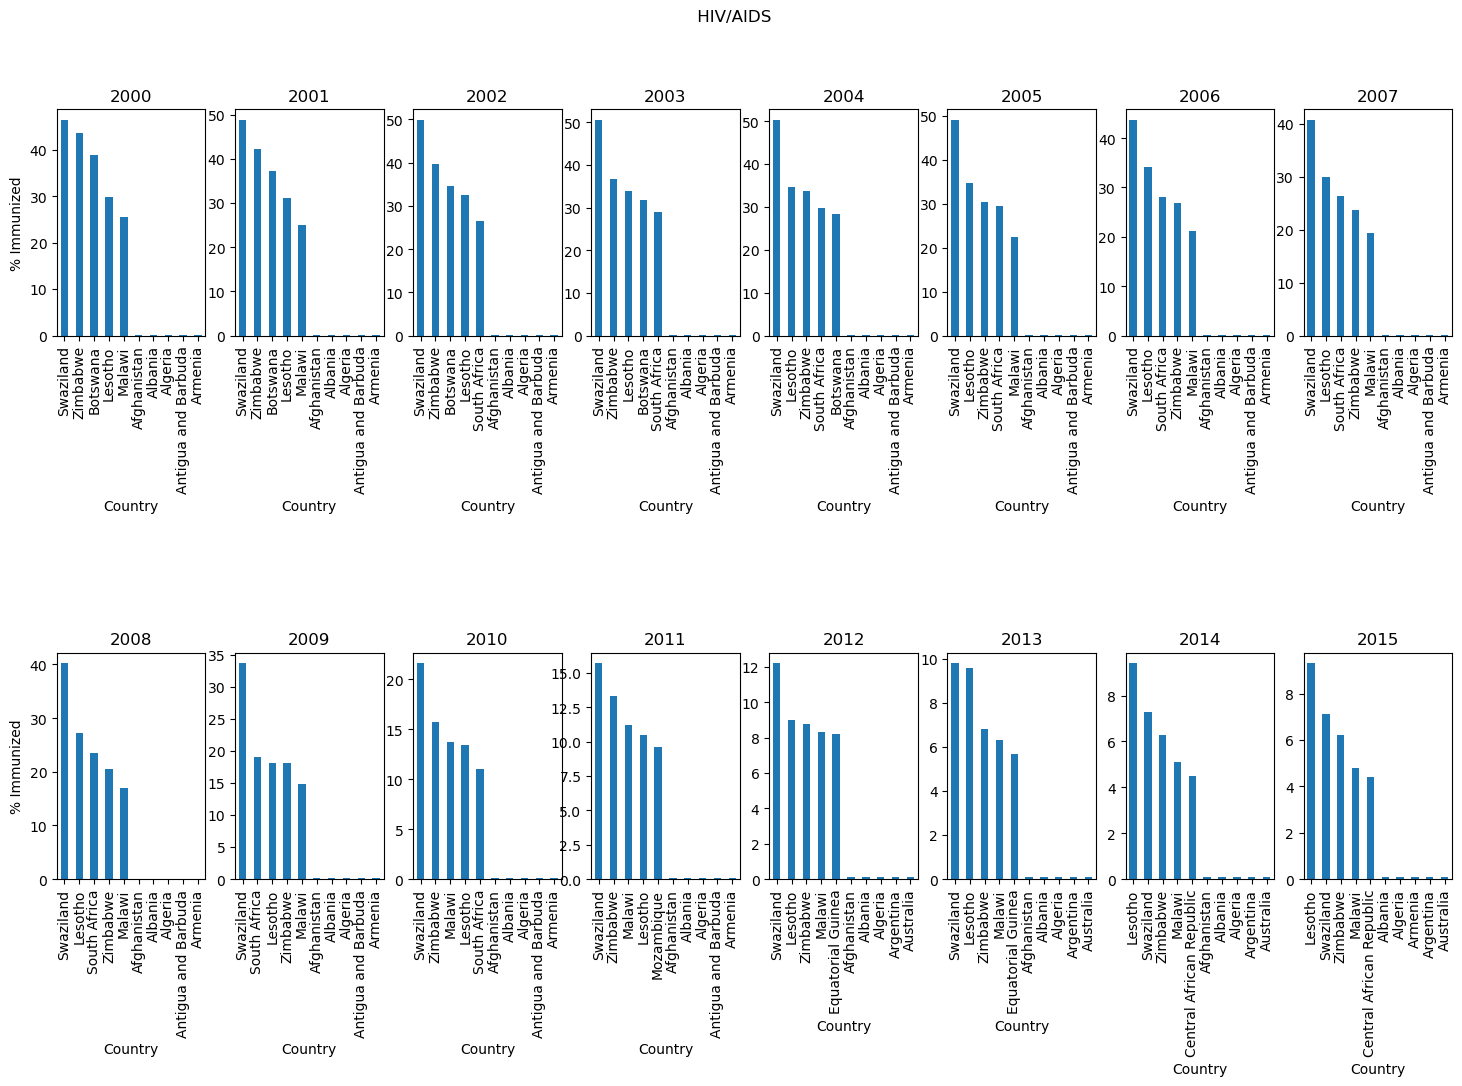

In [45]:
#
# Using a pre-defined list of health criteria, produce plots for each year of the best and worst 5 countries in that area
#

years = who_df['Year'].unique()
print(years)

for dcounter,disease in enumerate(disease_list[2:]): #skip the first element, which contains Country for use in other tasks
    print(disease)
    grouped_data = who_df.groupby(['Year', 'Country'])[['Life expectancy ', disease]].mean().reset_index()


    #get the years to plot
    unique_years = grouped_data['Year'].unique()
    
    #
    # Create a blank subplot figure to be filled in next
    #
    fig, axs = plot.subplots(nrows=2, ncols=8, figsize=(18, 10))
    axs_flat = axs.flatten()#replace with a 1d index for easier plotting

    fig.suptitle(str(disease))
    plot.subplots_adjust(hspace=1.4) # increase the vertical spacing
    
    for counter, year in enumerate(unique_years):

        data_sorted = grouped_data.reset_index().sort_values(by=disease, ascending=True)


        data_for_year = grouped_data[grouped_data['Year'] == year]
    
        # --- Polio Analysis for the current year ---
        # Sort by Polio descending to get the top 5
        top5 = data_for_year.sort_values(by=disease, ascending=False).head(5)
    
        # Sort by Polio ascending to get the lowest 5
        lowest5 = data_for_year.sort_values(by=disease, ascending=True).head(5)
    
        # Combine the top 5 and lowest 5 data for plotting
        highlow = pd.concat([top5, lowest5])

        # Create the bar plot for Polio for the current year
        #plt.figure(figsize=(12, 6))

        # Plot on the first subplot (top-left)
        highlow.sort_values(by=disease, ascending=False).plot(kind='bar',
                                                              ax=axs_flat[counter], #axs[0,0],
                                                              x='Country',
                                                              y=disease,
                                                             legend=False)#,x=disease)
        axs_flat[counter].set_title(str(year))
        if ((counter == 0) or (counter == 8)): #add one subplot to the start of the row
            axs_flat[counter].set_ylabel(disease_yaxis[dcounter])
        


### DISEASE Analysis !!! IN WORK:
For the Hepatitis B cases, the countries having the lowest percentage of immunization also scored relatively low on the life expectancy scale.






## INCOME

## Education

## HealthCare Expenditure

'\nsns.regplot(\n    data=who_df.loc[who_df[\'Status\'] == \'Developing\'],\n    x="percentage expenditure",\n    y="Life expectancy ",\n    scatter_kws={\'s\': 60, \'color\': \'red\', \'alpha\': 0.8, \'edgecolor\': \'white\'},\n #   line_kws={\'color\': \'blue\', \'linewidth\': 2},\n    #scatter=True\n)\n\nplot.xlabel(\'Percentage Expenditure towards Healthcare\')\nplot.ylabel(\'Life Expectancy (Years)\')\nplot.legend([\'Developed\',\'Developing\'])\n\n\n#plot.title("Healthcare Expenditure vs. Life Expectancy", fontsize=14, weight=\'bold\')\n#plot.xlabel("Percentage Expenditure on Healthcare", fontsize=10)\n#plot.ylabel("Life Expectancy (Years)", fontsize=10)\n\n\nplot.tight_layout()\n\nplot.show()\n'

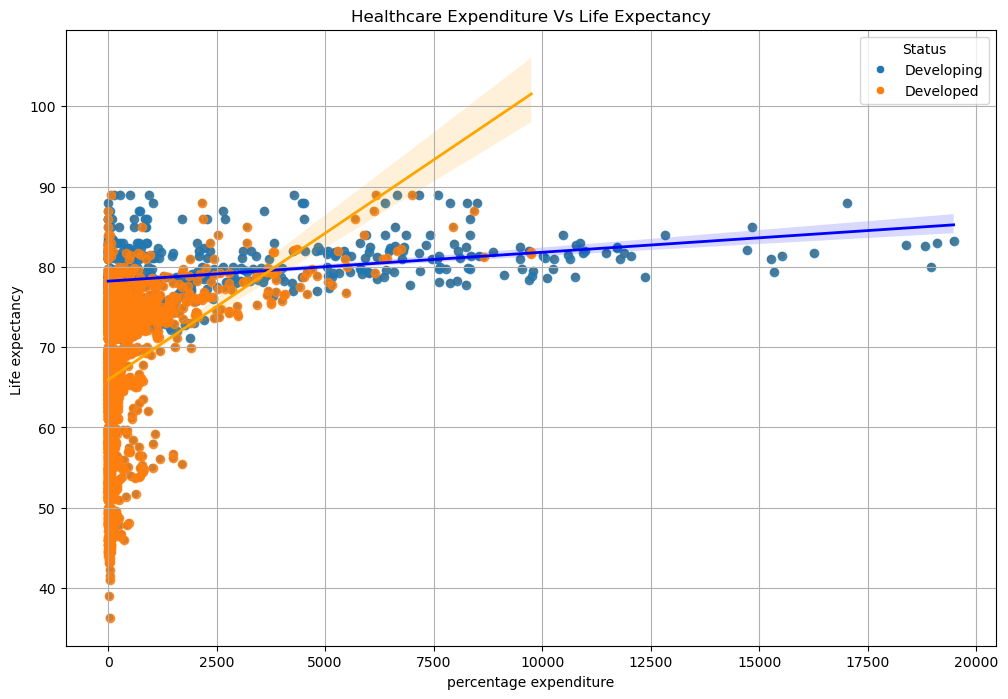

In [46]:
plot.figure(figsize=(12, 8))

#sns.regplot(
#    data=who_df,
#    x="percentage expenditure",
#    y="Life expectancy ",
#    scatter_kws={'s': 60, 'color': 'red', 'alpha': 0.8, 'edgecolor': 'white'},
#    line_kws={'color': 'blue', 'linewidth': 2},
#    #scatter=True
#)


sns.scatterplot(    data=who_df,
    x="percentage expenditure",
    y="Life expectancy ",hue='Status')


sns.regplot(
    data=who_df.loc[who_df['Status'] == 'Developed'],
    x="percentage expenditure",
    y="Life expectancy ",
    #scatter_kws={'s': 60, 'color': 'red', 'alpha': 0.8, 'edgecolor': 'white'},
    line_kws={'color': 'blue', 'linewidth': 2},
    #scatter=True
)

sns.regplot(
    data=who_df.loc[who_df['Status'] == 'Developing'],
    x="percentage expenditure",
    y="Life expectancy ",
    #scatter_kws={'s': 60, 'color': 'red', 'alpha': 0.8, 'edgecolor': 'white'},
    line_kws={'color': 'orange', 'linewidth': 2},
    #scatter=True
)

plot.grid(True)

plot.title('Healthcare Expenditure Vs Life Expectancy')


#sns.scatterplot(    data=who_df.loc[who_df['Status'] == 'Developed'],
#    x="percentage expenditure",
#    y="Life expectancy ",hue='Status')

#sns.scatterplot(    data=who_df.loc[who_df['Status'] == 'Developing'],
#    x="percentage expenditure",
#    y="Life expectancy ")
'''
sns.regplot(
    data=who_df.loc[who_df['Status'] == 'Developed'],
    x="percentage expenditure",
    y="Life expectancy ",
    scatter_kws={'s': 60, 'color': 'green', 'alpha': 0.8, 'edgecolor': 'white'},
    line_kws={'color': 'blue', 'linewidth': 2},
    #scatter=True
)
'''
'''
sns.regplot(
    data=who_df.loc[who_df['Status'] == 'Developing'],
    x="percentage expenditure",
    y="Life expectancy ",
    scatter_kws={'s': 60, 'color': 'red', 'alpha': 0.8, 'edgecolor': 'white'},
 #   line_kws={'color': 'blue', 'linewidth': 2},
    #scatter=True
)

plot.xlabel('Percentage Expenditure towards Healthcare')
plot.ylabel('Life Expectancy (Years)')
plot.legend(['Developed','Developing'])


#plot.title("Healthcare Expenditure vs. Life Expectancy", fontsize=14, weight='bold')
#plot.xlabel("Percentage Expenditure on Healthcare", fontsize=10)
#plot.ylabel("Life Expectancy (Years)", fontsize=10)


plot.tight_layout()

plot.show()
'''

### Analysis: Healthcare
  This plot shows the percentage expenditure (GDP/capita) between the developing nations (shown in orange markers) and the developed nations (blue markers). The regplot tool generates a linear regression line on the datasets (here, the Developing and Developed feature columns) to show the trend for each. The developing nations show a mostly level trend, likely meaning that extra infusion of healthcare expenditure only provides a marginal improvement. The developing nations trend shows a far different story, as an increase in expenditure provides significant boosts to life expectancy.
  
  The developing nations feature is mostly clustered towards the lower end of the expenditures, so it makes sense that an increase in spending would provide a larger benefit than the developed nations, where they are likely plateuaed with their current level of healthcare.


In [47]:
who_df['Status'].loc[who_df['Status'] == 'Developing']

0       Developing
1       Developing
2       Developing
3       Developing
4       Developing
           ...    
2933    Developing
2934    Developing
2935    Developing
2936    Developing
2937    Developing
Name: Status, Length: 2426, dtype: object